In [1]:
#시작 전 설정
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'
import pandas as pd
import numpy as np
#원하는 한글폰트 지정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus=False) #Y축
#경고메세지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import seaborn as sns

In [2]:
cond_1=pd.read_excel('E:/kim_jiwon/src/Project_02/data/1_국민관심질병성별입원외래별현황(진료년월)(2017-2018).xls')
cond_1['']=cond_1.iloc[:,1]+[' ']+cond_1['진료년월']
cond_1

cond_1_1=cond_1.set_index(cond_1.iloc[:,-1])
cond_1_1=cond_1_1.iloc[:,3:]
cond_1_1
patient_0=cond_1_1.T.reset_index()
patient_0.columns=['기간','항목','소계','남 소계','남 외래','남 입원','여 소계','여 외래','여 입원']
patient_0

,기간,항목,소계,남 소계,남 외래,남 입원,여 소계,여 외래,여 입원
0,2017년 01월,환자수,"251,149","79,856","78,814","1,340","171,293","170,326","1,516"
1,2017년 01월.1,내원일수,"425,810","144,927","116,903","28,024","280,883","252,650","28,233"
2,2017년 01월.2,청구건수,"372,853","118,436","116,926","1,510","254,417","252,693","1,724"
3,2017년 01월.3,요양급여비용총액,"22,055,728","7,817,540","5,362,465","2,455,075","14,238,188","11,338,373","2,899,815"
4,2017년 01월.4,보험자부담금,"14,977,440","5,335,352","3,475,957","1,859,395","9,642,088","7,434,481","2,207,606"
...,...,...,...,...,...,...,...,...,...
116,2018년 12월.1,내원일수,"509,368","169,878","146,285","23,593","339,490","313,734","25,756"
117,2018년 12월.2,청구건수,"463,406","147,714","146,298","1,416","315,692","313,766","1,926"
118,2018년 12월.3,요양급여비용총액,"28,247,226","9,651,377","7,432,178","2,219,198","18,595,849","15,694,719","2,901,130"
119,2018년 12월.4,보험자부담금,"21,102,776","7,164,401","5,488,911","1,675,490","13,938,375","11,722,428","2,215,947"


In [3]:
import pandas as pd
cond=pd.read_excel('E:/kim_jiwon/src/Project_02/data/1_국민관심질병성별입원외래별현황(진료년월).xls')
#cond=cond.iloc[:,1:]
#cond1=cond1.loc[:,'진료년월':]
cond['']=cond.iloc[:,1]+[' ']+cond['진료년월']
cond1=cond.set_index(cond.iloc[:,-1])
cond1=cond1.iloc[:,3:]

In [4]:
patient_1=cond1.T.reset_index()
patient_1.columns=['기간','항목','소계','남 소계','남 외래','남 입원','여 소계','여 외래','여 입원']

In [5]:
patient=pd.concat([patient_0,patient_1],axis=0).reset_index(drop=True)
patient["기간"]= patient["기간"].apply(lambda x:str(x.split(".")[0]))
patient

,기간,항목,소계,남 소계,남 외래,남 입원,여 소계,여 외래,여 입원
0,2017년 01월,환자수,"251,149","79,856","78,814","1,340","171,293","170,326","1,516"
1,2017년 01월,내원일수,"425,810","144,927","116,903","28,024","280,883","252,650","28,233"
2,2017년 01월,청구건수,"372,853","118,436","116,926","1,510","254,417","252,693","1,724"
3,2017년 01월,요양급여비용총액,"22,055,728","7,817,540","5,362,465","2,455,075","14,238,188","11,338,373","2,899,815"
4,2017년 01월,보험자부담금,"14,977,440","5,335,352","3,475,957","1,859,395","9,642,088","7,434,481","2,207,606"
...,...,...,...,...,...,...,...,...,...
217,2020년 08월,내원일수,"556,163","179,538","161,016","18,522","376,625","354,540","22,085"
218,2020년 08월,청구건수,"518,648","162,289","161,100","1,189","356,359","354,682","1,677"
219,2020년 08월,요양급여비용총액,"33,210,825","10,828,993","8,923,061","1,905,932","22,381,833","19,623,837","2,757,995"
220,2020년 08월,보험자부담금,"25,274,579","8,188,274","6,754,788","1,433,485","17,086,305","14,993,148","2,093,156"


In [6]:
#환자수로 통계

In [7]:
patient_amount=patient[patient['항목']=='환자수']

patient_amount.replace(',','', regex=True, inplace=True)
patient_amount.loc[:,"소계":"여 입원"]=patient_amount.loc[:,"소계":"여 입원"].astype(int)
patient_amount.info()
patient_amount_mat=patient_amount.set_index('기간')
patient_amount_mat

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44 entries, 0 to 216
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   기간      44 non-null     object
 1   항목      44 non-null     object
 2   소계      44 non-null     object
 3   남 소계    44 non-null     object
 4   남 외래    44 non-null     object
 5   남 입원    44 non-null     object
 6   여 소계    44 non-null     object
 7   여 외래    44 non-null     object
 8   여 입원    44 non-null     object
dtypes: object(9)
memory usage: 3.4+ KB


,항목,소계,남 소계,남 외래,남 입원,여 소계,여 외래,여 입원
기간,,,,,,,,
2017년 01월,환자수,251149,79856,78814,1340,171293,170326,1516
2017년 02월,환자수,254649,81130,80118,1223,173519,172634,1350
2017년 03월,환자수,264281,84186,83194,1265,180095,179159,1419
2017년 04월,환자수,258495,82397,81387,1235,176098,175170,1435
2017년 05월,환자수,265616,84358,83346,1239,181258,180363,1474
2017년 06월,환자수,269660,85706,84654,1305,183954,183060,1493
2017년 07월,환자수,270815,86336,85271,1336,184479,183533,1558
2017년 08월,환자수,276715,88499,87477,1277,188216,187268,1506
2017년 09월,환자수,285346,90073,89045,1281,195273,194328,1516


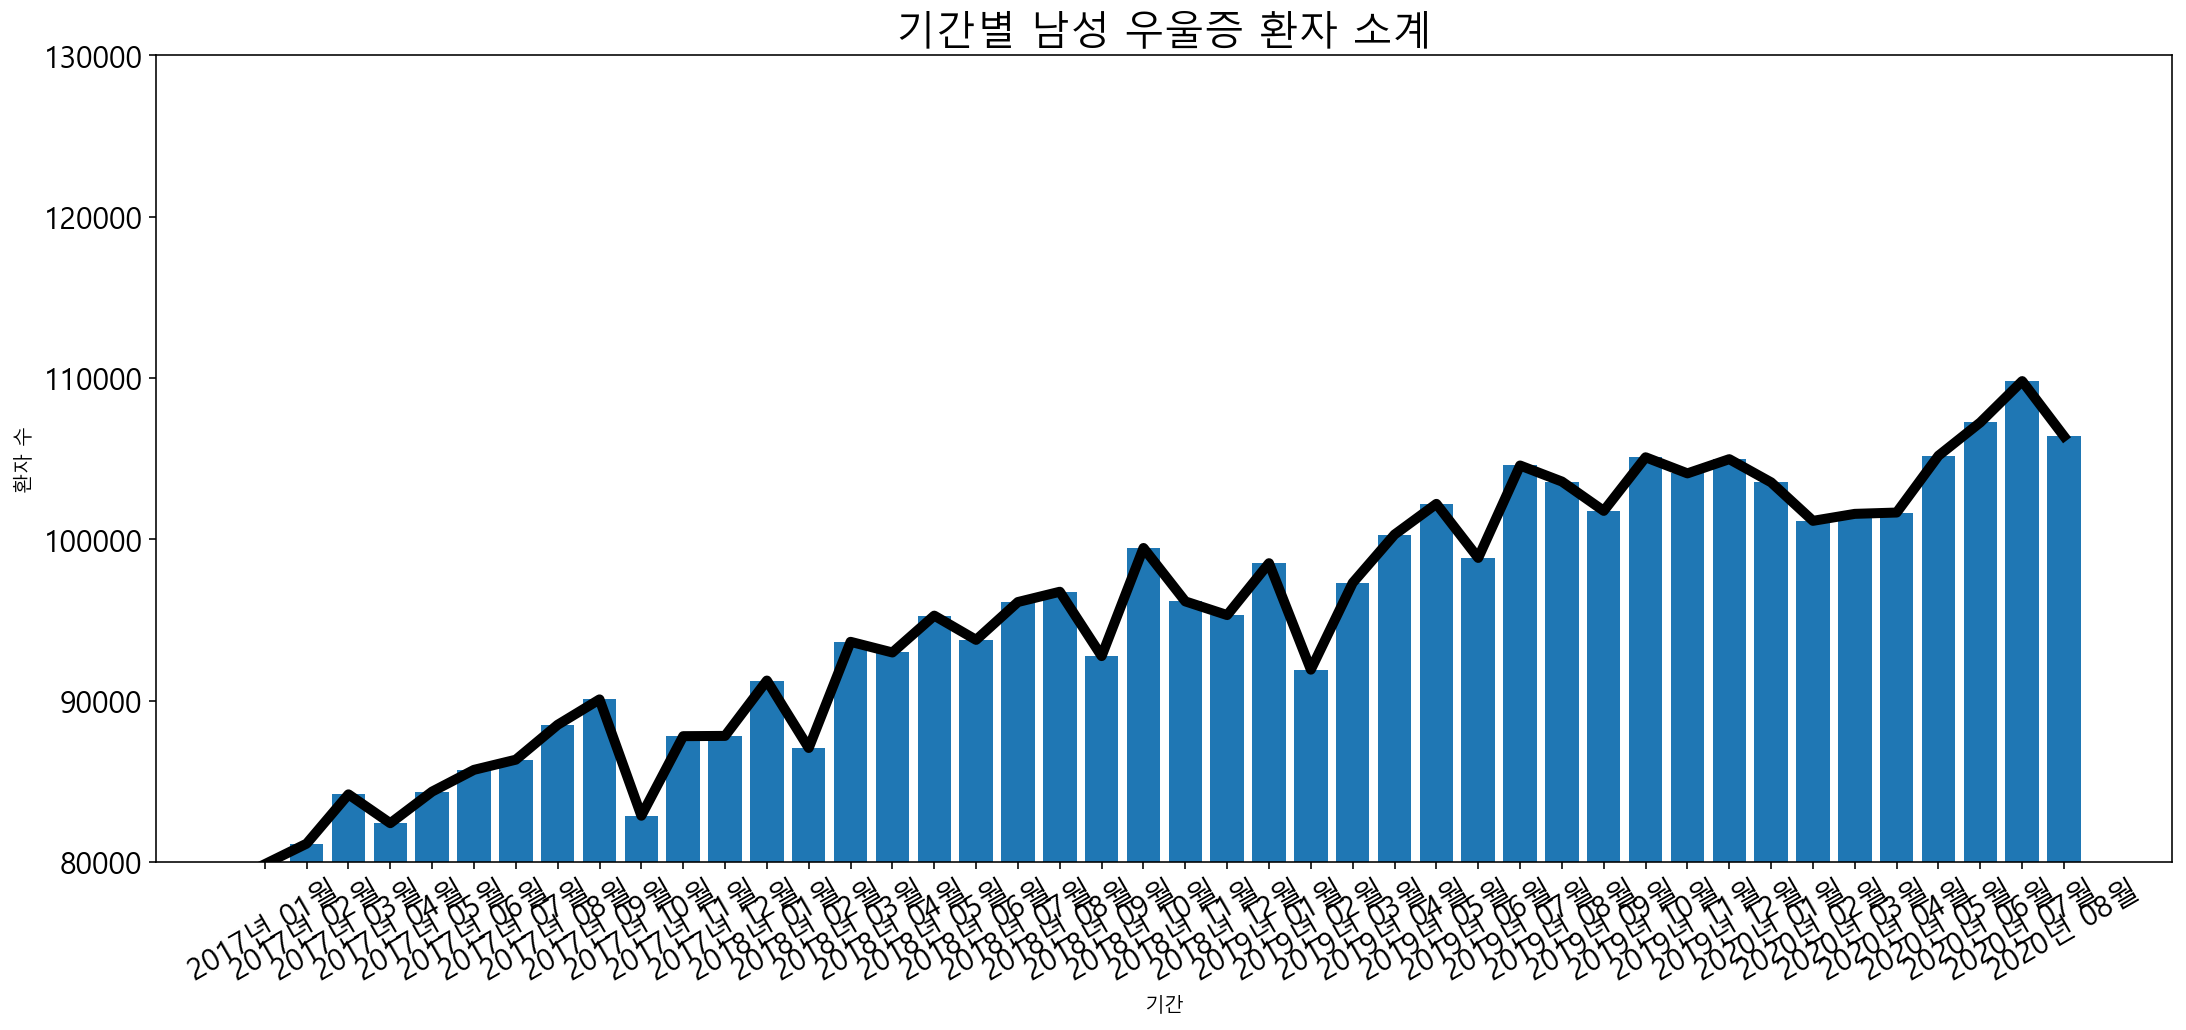

In [8]:
fig=plt.figure(figsize=(20,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.bar(x="기간", height="남 소계", width=0.8, align='center', data=patient_amount)
plt.plot("기간", "남 소계",data=patient_amount,linewidth=5, color='Black')
ax.set_title('기간별 남성 우울증 환자 소계', fontsize=20)
ax.set_xlabel('기간')
ax.set_ylabel('환자 수')
plt.ylim([80000,130000])
ax.tick_params(axis='x',labelsize=15,rotation=30)
ax.tick_params(axis='y',labelsize=15)

plt.savefig('E:/kim_jiwon/src/project_02/graph/기간별 성별별 우울증 환자 내원일수.png')

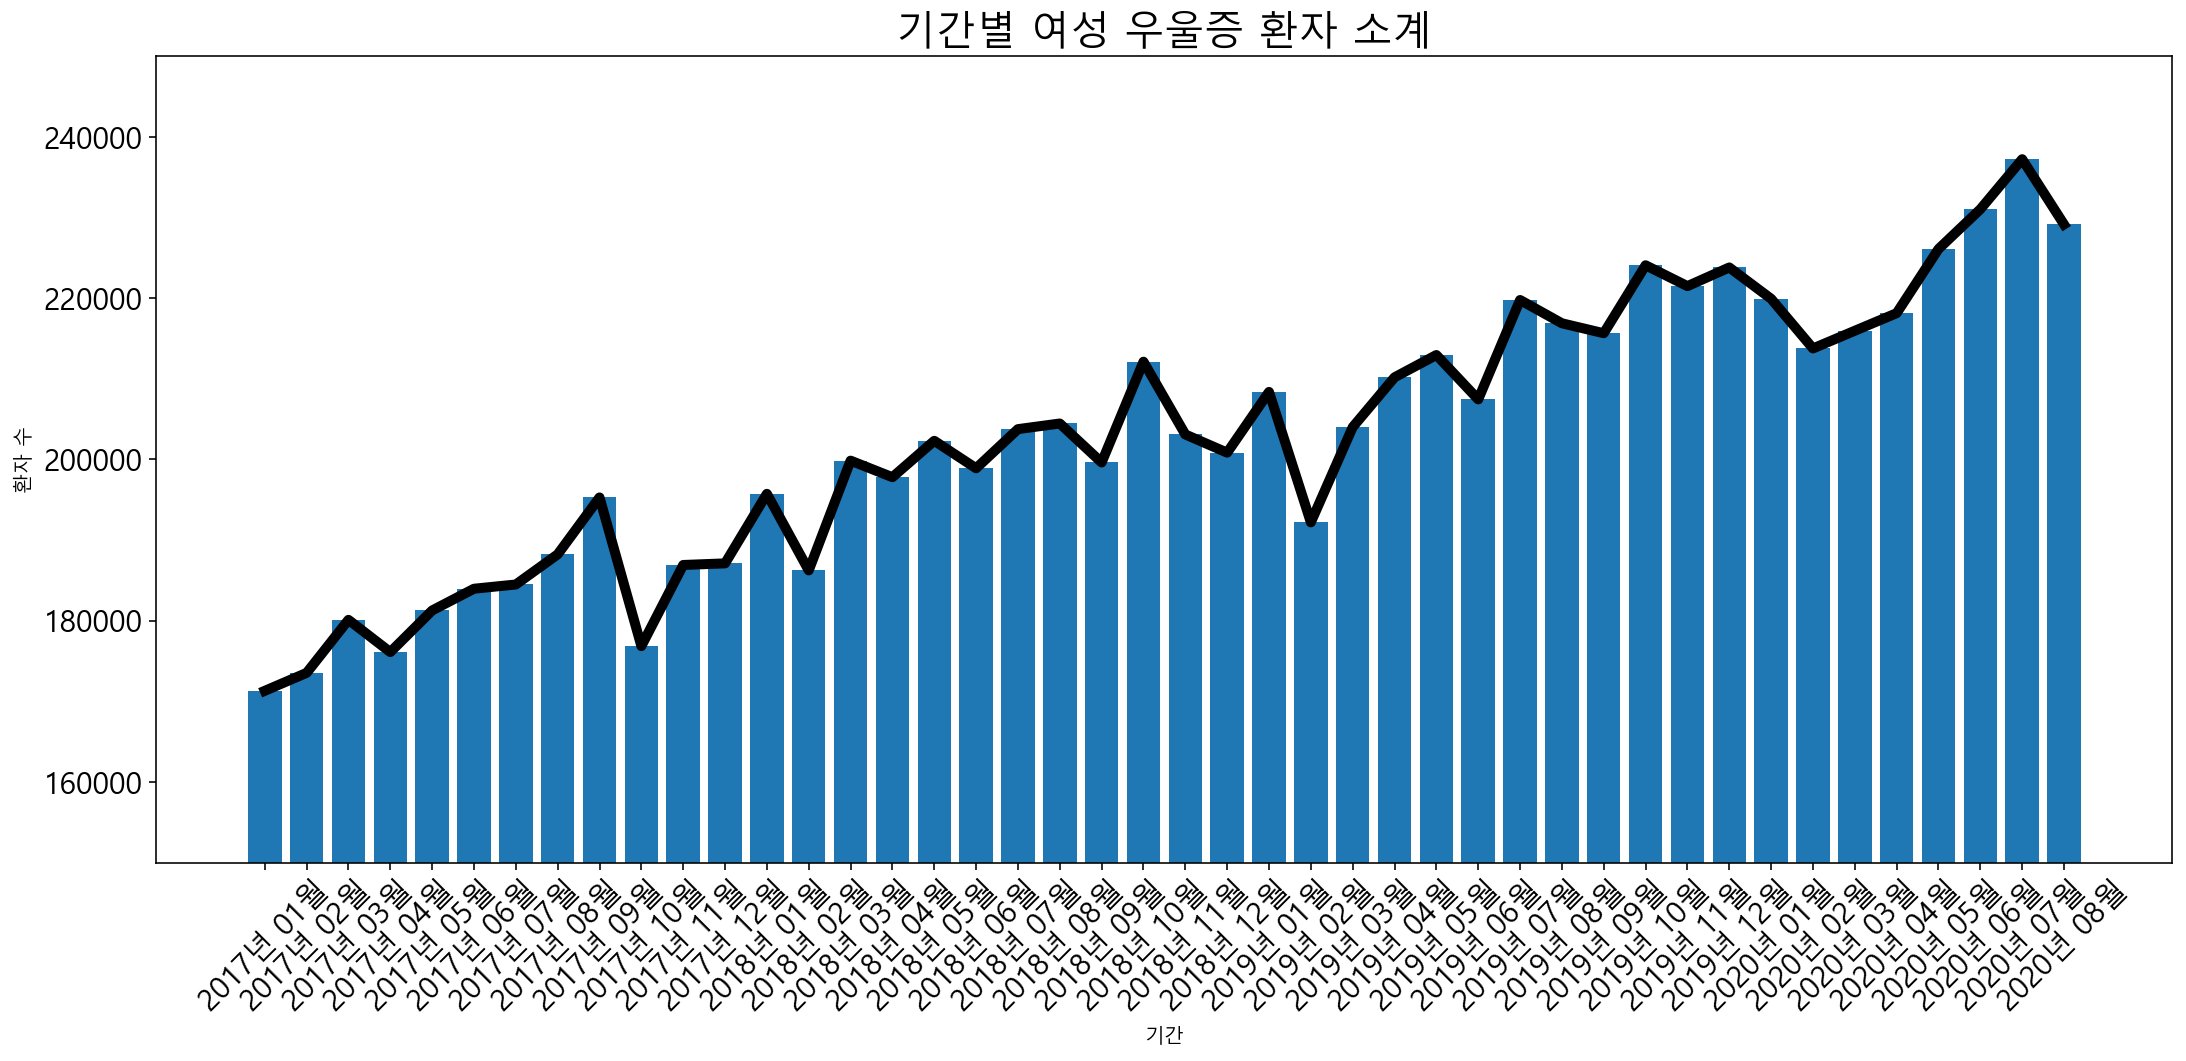

In [9]:
fig=plt.figure(figsize=(20,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.bar(x="기간", height="여 소계", width=0.8, align='center', data=patient_amount)
plt.plot("기간", "여 소계",data=patient_amount,linewidth=5, color='Black')
ax.set_title('기간별 여성 우울증 환자 소계', fontsize=20)
ax.set_xlabel('기간')
ax.set_ylabel('환자 수')
plt.ylim([150000,250000])
ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)


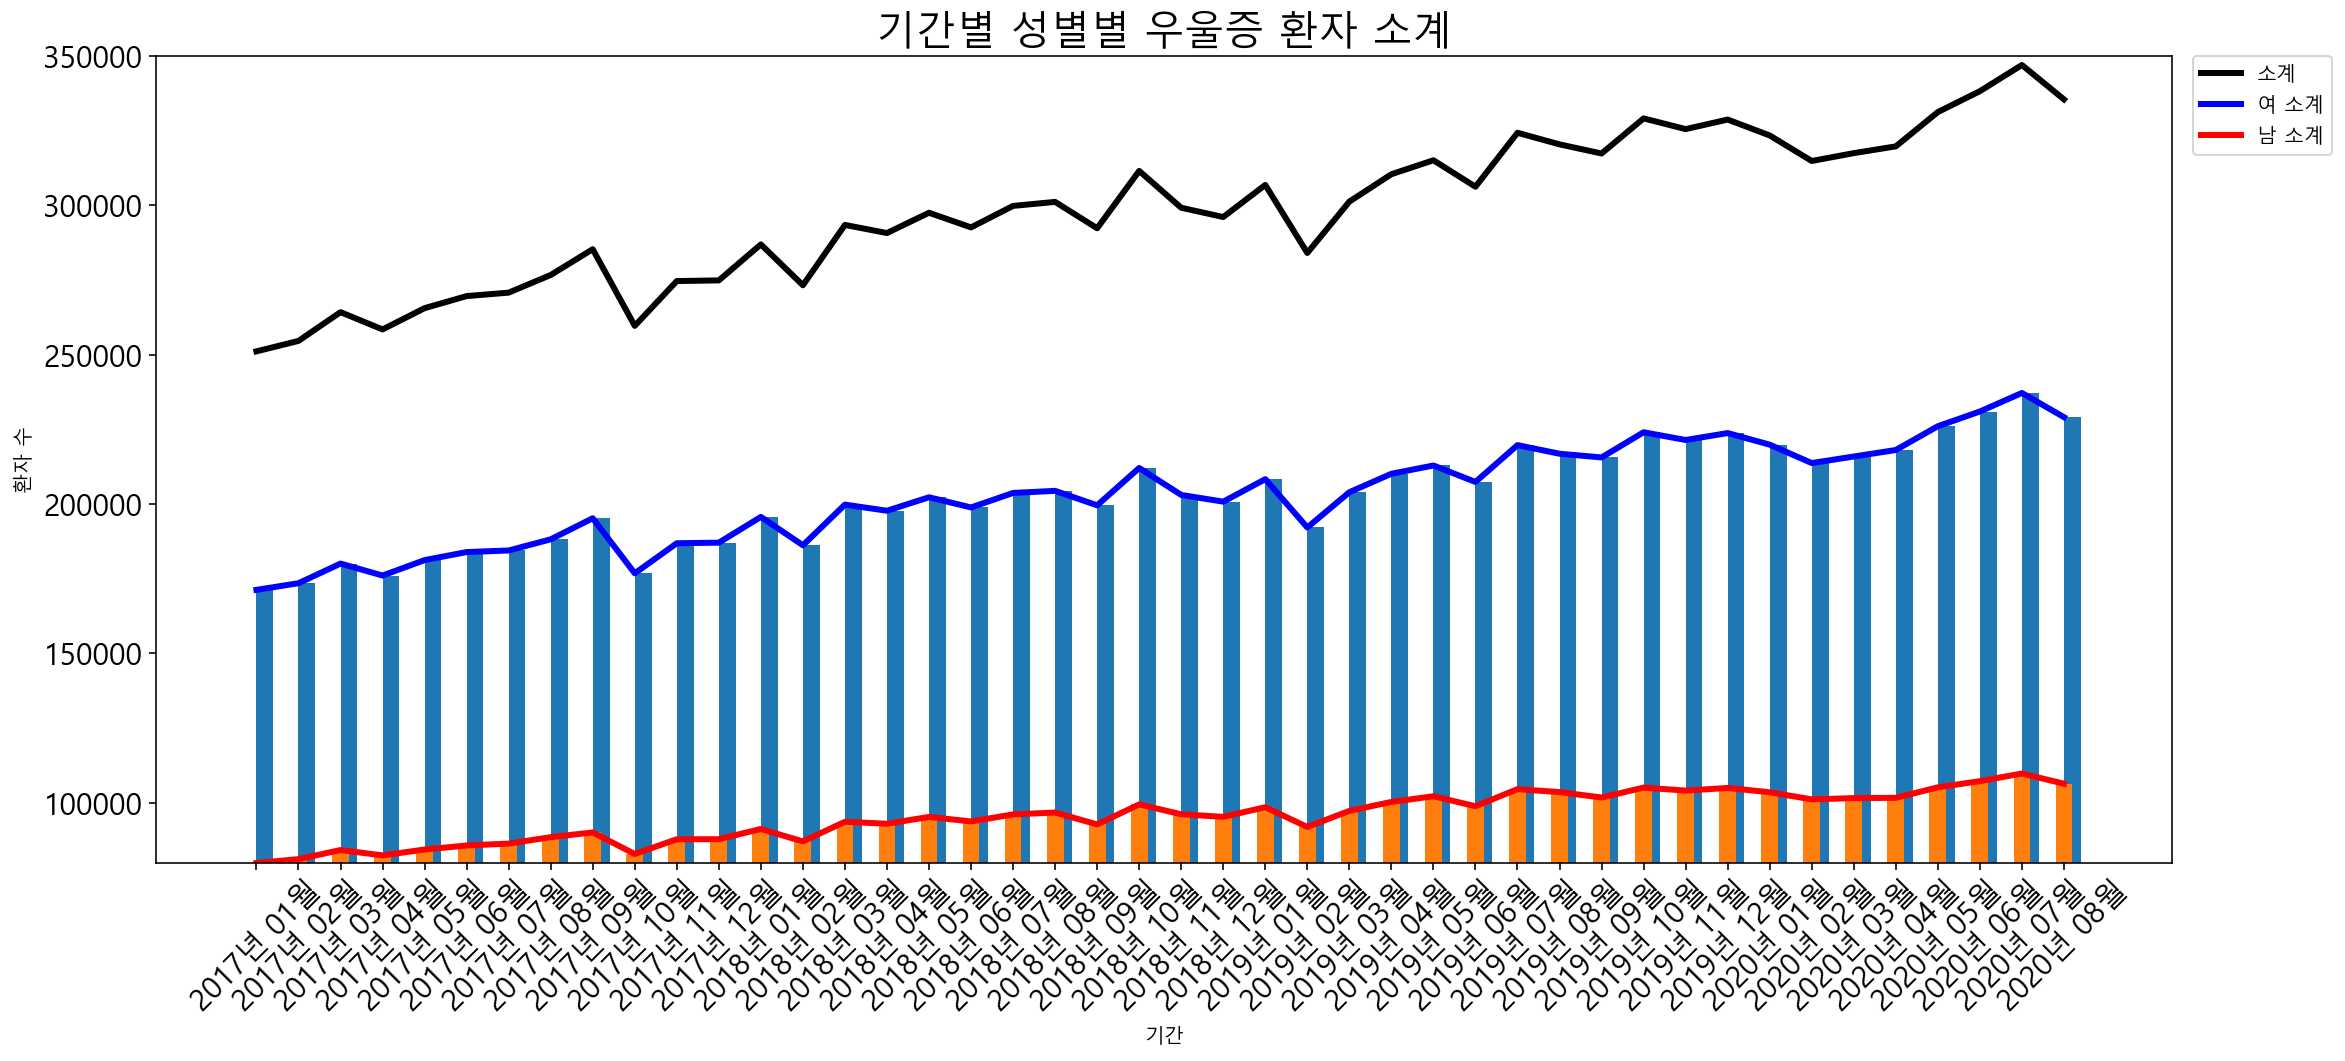

In [23]:
fig=plt.figure(figsize=(20,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.plot("기간", "소계",data=patient_amount,linewidth=3, color='black')
plt.bar(x="기간", height="여 소계", width=0.4, align='edge', data=patient_amount)
plt.plot("기간", "여 소계",data=patient_amount,linewidth=3, color='Blue')
plt.bar(x="기간", height="남 소계", width=0.4, align='center', data=patient_amount)
plt.plot("기간", "남 소계",data=patient_amount,linewidth=3, color='red')
ax.set_title('기간별 성별별 우울증 환자 소계', fontsize=20)
ax.set_xlabel('기간')
ax.set_ylabel('환자 수')
plt.ylim([80000,350000])
ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)
plt.legend(bbox_to_anchor=(1.01,1.0),loc=0,borderaxespad=0)
plt.savefig('E:/kim_jiwon/src/project_02/graph/기간별 성별별 우울증 환자 소계.png')

In [11]:
#내원일수 통계

In [12]:
#내원일수선별
patient_days=patient[patient['항목']=='내원일수']
#쉼표제거
patient_days.replace(',','', regex=True, inplace=True)
#인덱스 설정
#patient_days=patient_days.set_index('기간')
#타입인트
patient_days.iloc[:,2:]=patient_days.iloc[:,2:].astype(int)
patient_days_mat=patient_days
patient_days_mat

,기간,항목,소계,남 소계,남 외래,남 입원,여 소계,여 외래,여 입원
1,2017년 01월,내원일수,425810,144927,116903,28024,280883,252650,28233
6,2017년 02월,내원일수,418761,141445,117039,24406,277316,252917,24399
11,2017년 03월,내원일수,458115,154439,127923,26516,303676,276933,26743
16,2017년 04월,내원일수,437426,147684,121821,25863,289742,263625,26117
21,2017년 05월,내원일수,457981,152604,126683,25921,305377,278933,26444
26,2017년 06월,내원일수,464320,155454,129101,26353,308866,282930,25936
31,2017년 07월,내원일수,470643,158516,130870,27646,312127,283608,28519
36,2017년 08월,내원일수,478505,161289,134062,27227,317216,289912,27304
41,2017년 09월,내원일수,509605,168752,142480,26272,340853,313748,27105
46,2017년 10월,내원일수,416762,140910,115044,25866,275852,249283,26569


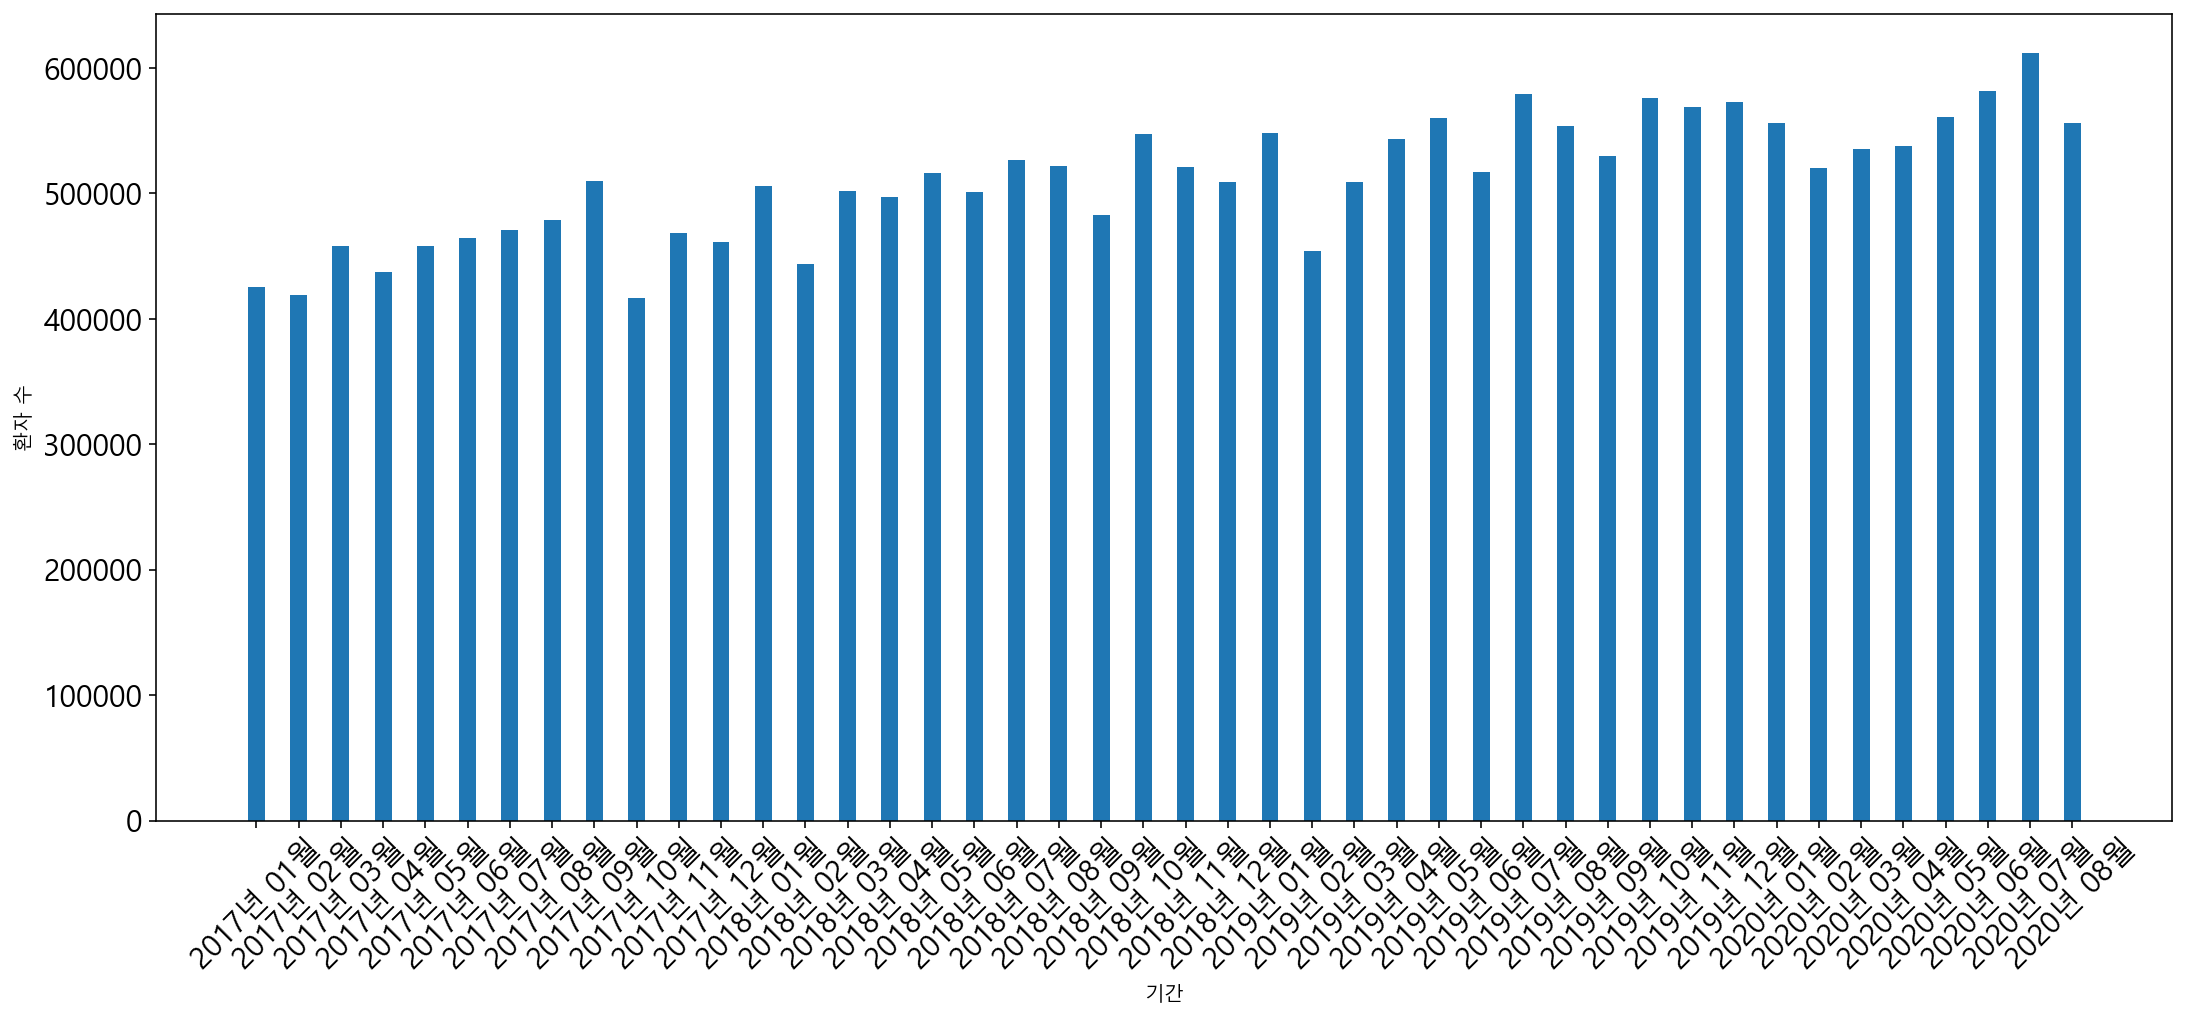

In [13]:
fig=plt.figure(figsize=(20,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.bar(x="기간", height="소계", width=0.4, align='center', data=patient_days_mat)

ax.set_xlabel('기간')
ax.set_ylabel('환자 수')
ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)

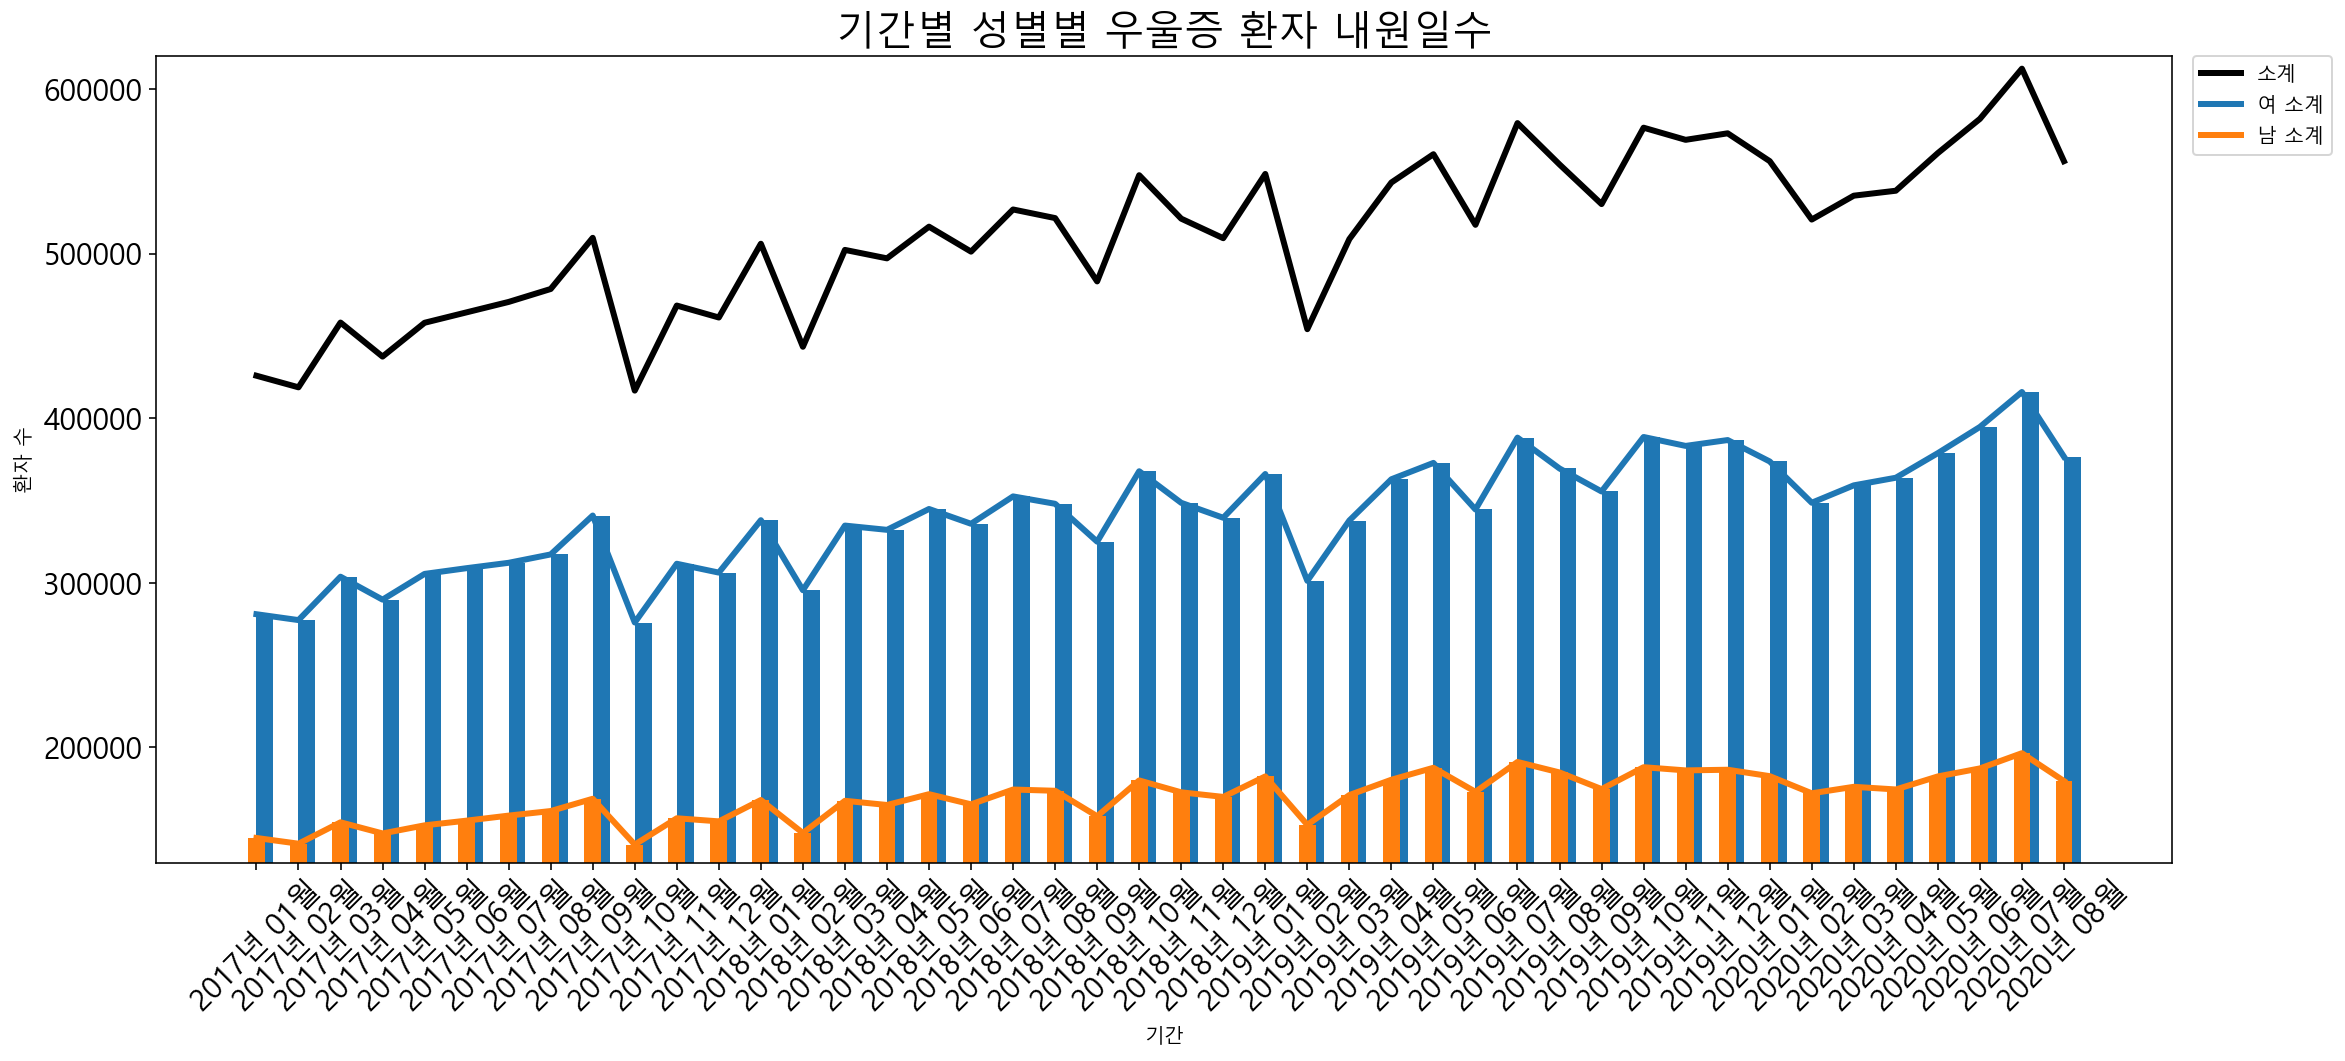

In [14]:
fig=plt.figure(figsize=(20,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.plot("기간", "소계",data=patient_days,linewidth=3, color='black')
plt.bar(x="기간", height="여 소계", width=0.4, align='edge', data=patient_days)
plt.plot("기간", "여 소계",data=patient_days,linewidth=3)
plt.bar(x="기간", height="남 소계", width=0.4, align='center', data=patient_days)
plt.plot("기간", "남 소계",data=patient_days,linewidth=3)

ax.set_title('기간별 성별별 우울증 환자 내원일수', fontsize=20)
ax.set_xlabel('기간')
ax.set_ylabel('환자 수')

ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)
plt.ylim([130000,620000])
plt.legend(bbox_to_anchor=(1.01,1.0),loc=0,borderaxespad=0)
plt.savefig('E:/kim_jiwon/src/project_02/graph/기간별 성별별 우울증 환자 내원일수.png')

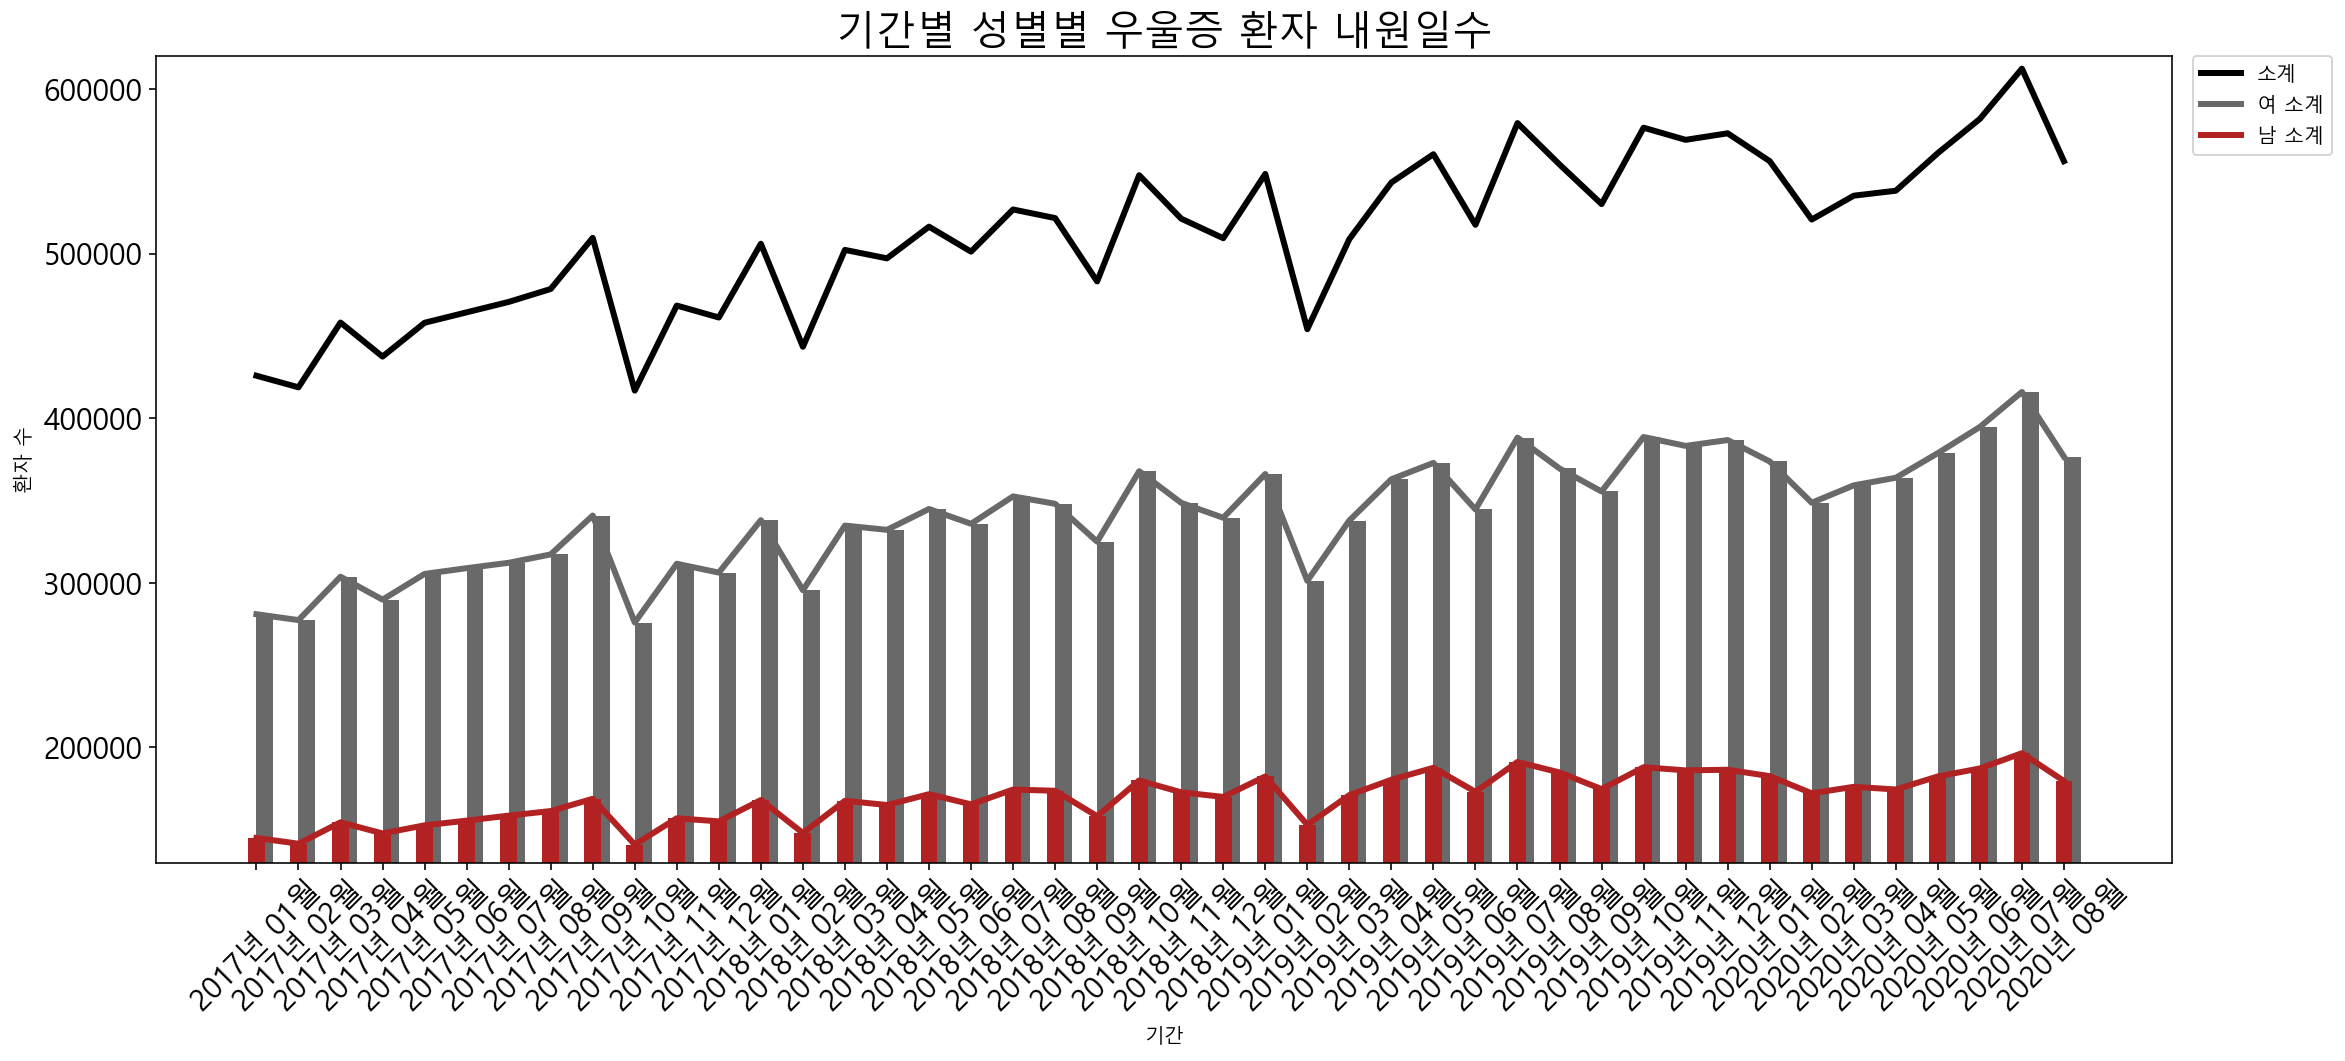

In [15]:
fig=plt.figure(figsize=(20,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.plot("기간", "소계",data=patient_days,linewidth=3, color='black')
plt.bar(x="기간", height="여 소계", width=0.4, align='edge', data=patient_days, color='dimgray')
plt.plot("기간", "여 소계",data=patient_days,linewidth=3, color='dimgray')
plt.bar(x="기간", height="남 소계", width=0.4, align='center', data=patient_days,color='firebrick')
plt.plot("기간", "남 소계",data=patient_days,linewidth=3, color='firebrick')
ax.set_title('기간별 성별별 우울증 환자 내원일수', fontsize=20)
ax.set_xlabel('기간')
ax.set_ylabel('환자 수')

ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)
plt.ylim([130000,620000])
plt.legend(bbox_to_anchor=(1.01,1.0),loc=0,borderaxespad=0)
plt.savefig('E:/kim_jiwon/src/project_02/graph/기간별 성별별 우울증 환자 내원일수.png')

In [16]:
#청구건수통계

In [17]:
#청구건수선별
patient_counts=patient[patient['항목']=='청구건수']
#쉼표제거
patient_counts.replace(',','', regex=True, inplace=True)
#인덱스 설정
#patient_counts=patient_days.set_index('기간')
#타입인트
patient_counts.iloc[:,2:]=patient_counts.iloc[:,2:].astype(int)
patient_counts_mat=patient_counts
patient_counts_mat

,기간,항목,소계,남 소계,남 외래,남 입원,여 소계,여 외래,여 입원
2,2017년 01월,청구건수,372853,118436,116926,1510,254417,252693,1724
7,2017년 02월,청구건수,372941,118438,117052,1386,254503,252967,1536
12,2017년 03월,청구건수,408039,129424,127944,1480,278615,276980,1635
17,2017년 04월,청구건수,388537,123249,121836,1413,265288,263653,1635
22,2017년 05월,청구건수,408777,128123,126693,1430,280654,278961,1693
27,2017년 06월,청구건수,415468,130705,129174,1531,284763,283048,1715
32,2017년 07월,청구건수,417831,132429,130890,1539,285402,283644,1758
37,2017년 08월,청구건수,427286,135568,134084,1484,291718,289953,1765
42,2017년 09월,청구건수,459518,143944,142499,1445,315574,313795,1779
47,2017년 10월,청구건수,367307,116364,115056,1308,250943,249327,1616


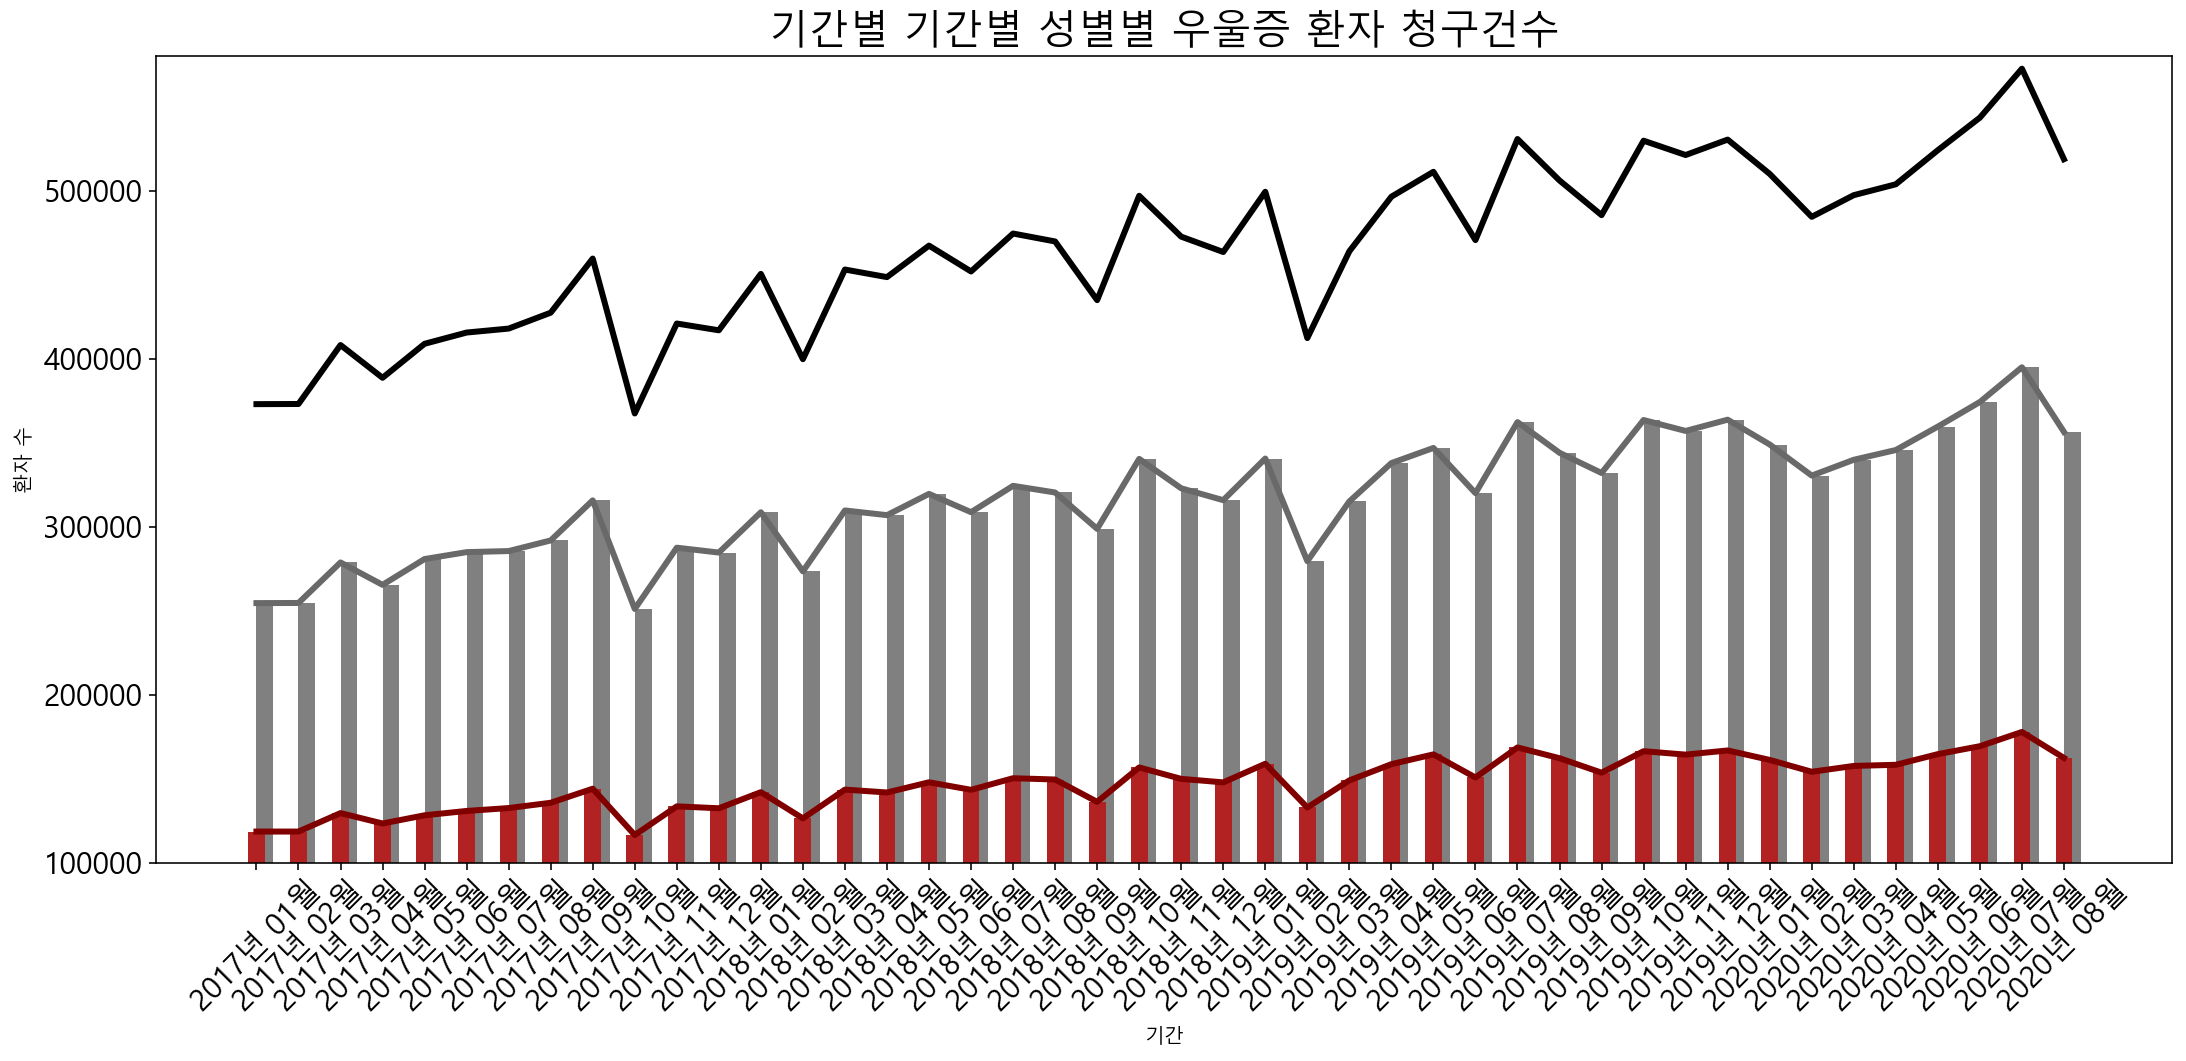

In [18]:
fig=plt.figure(figsize=(20,8))
ax = fig.add_axes([0.1,0.1,0.7,0.7])
plt.plot("기간", "소계",data=patient_counts,linewidth=3, color='black')
plt.bar(x="기간", height="여 소계", width=0.4, align='edge', data=patient_counts,color='gray')
plt.plot("기간", "여 소계",data=patient_counts,linewidth=3, color='dimgrey')
plt.bar(x="기간", height="남 소계", width=0.4, align='center', data=patient_counts,color='firebrick')
plt.plot("기간", "남 소계",data=patient_counts,linewidth=3,color='maroon')
ax.set_title('기간별 기간별 성별별 우울증 환자 청구건수', fontsize=20)
ax.set_xlabel('기간')
ax.set_ylabel('환자 수')

ax.tick_params(axis='x',labelsize=15,rotation=45)
ax.tick_params(axis='y',labelsize=15)
plt.ylim([100000,580000])
plt.savefig('E:/kim_jiwon/src/project_02/graph/기간별 성별별 우울증 환자 청구건수.png')